In [2]:
from functools import partial, reduce
from itertools import *
import operator

from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option("display.max_rows", 20)

# definitions

term |  definition
:--- | :---------
experiment | a situation involving chance
trial | ??
outcome | a result of a single trial
outcomes | all the possible results of the experiment
event | one (or more?) outcomes actually occurring
compound event | an event consisting on two or more events (multiple trials?)
probability (of an event) | likelihood of an event occurring
sample space | set of all possible outcomes of that experiment
mutually exclusive events | they cannot occur at the same time (no outcomes in common)
independent events | A and B are independent of occurance of A does not influence probability of B occuring
conditional probability | the probability that event B occurs given that event A has already occurred: $$p(B|A)$$

$$(1) P(A) = \frac {\text{number of ways event A can occur}}{\text{total number of possible outcomes}}$$

$$(2) \sum_{A \in S} P(A) = 1, \quad \text{S is the sample space}$$

$$(3) P(\bar{A}) = 1 - P(A)$$

$$(4) P(A \lor B) = P(A) + P(B), \quad A \cap B = \emptyset \quad \text{(exclusive events)}$$

$$(5) P(A \lor B) = P(A) + P(B) - P(A \land B), \quad A \cap B \neq \emptyset  \quad \text{(non-exclusive events)}$$

$$(6) P(A \land B) = P(A) * P(B), \quad P(B|A) = P(B|{\bar A}) \quad \text{(independent events)}$$

$$(7) P(A \land B) = P(A) * P(B|A), \quad P(B|A) \neq P(B|{\bar A}) \quad \text{(dependent events)}$$

$$(8) P(B|A) = \frac{P(A \land B)}{P(A)}$$

$$A \not \Rightarrow B$$

# more definitions

term |  definition
--- | ---
sample | A set of data collected and/or selected from a statistical population by a defined procedure. The elements of a sample are known as sample points, sampling units or observations
statistic | A single measure of some attribute of a sample (e.g. its arithmetic mean value). It is calculated by applying a function (statistical algorithm) to the values of the items of the sample, which are known together as a set of data. The term statistic is used both for the function and for the value of the function on a given sample.
variable | a formal name for "features" of individuals, that may have different values throughout the population
quantitative or numerical variables | have numeric values, the feature is a measure
categorical variables | values are indicating a category the individual is part of
distribution | shows all the values of a variable, along with the frequency of each one

In [5]:
jury = pd.DataFrame({
    'Eligible': (0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels': (0.26, 0.08, 0.08, 0.54, 0.04)
    }, 
    index=('Asian', 'Black', 'Latino', 'White', 'Other')
)
jury

,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


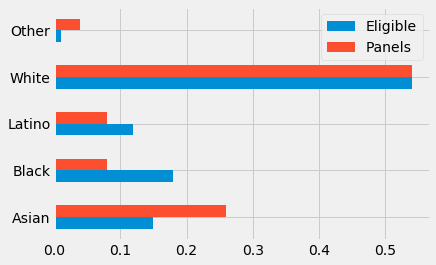

In [6]:
jury.plot.barh()

# even more definitions

term |  definition
--- | ---
total variation distance between two distributions | sum of all the absolute differences for each category divided by two (as positive and negative diffs will be equal)

In [13]:
diffs = jury["Eligible"] - jury["Panels"]
diffs

Asian    -0.11
Black     0.10
Latino    0.04
White     0.00
Other    -0.03
dtype: float64

In [17]:
diffs.where(diffs < 0).sum(), diffs.where(diffs >= 0).sum()

(-0.14, 0.13999999999999999)

In [20]:
def total_variation_distance(distrib1, distrib2):
    return abs(distrib1 - distrib2).sum() / 2

In [21]:
total_variation_distance(jury["Eligible"], jury["Panels"])

0.14

In [22]:
eligible = jury["Eligible"]

In [28]:
sampled_panels = pd.DataFrame({"Random Sample": np.random.multinomial(1453, eligible)})
sampled_panels

,Random Sample
0,209
1,251
2,169
3,812
4,12


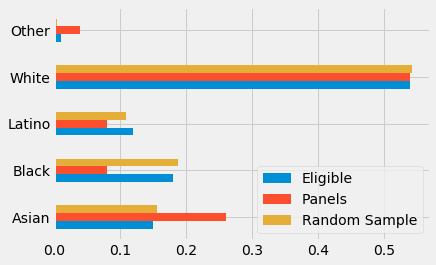

In [35]:
jury_with_randomsample = jury.copy()
jury_with_randomsample["Random Sample"] = np.random.multinomial(1453, eligible)/1453
jury_with_randomsample.plot.barh()

In [36]:
total_variation_distance(eligible, jury_with_randomsample["Panels"])

0.14

In [37]:
total_variation_distance(eligible, jury_with_randomsample["Random Sample"])

0.016441844459738432

In [47]:
samples = 100000
sample_distances=np.empty(samples)
for i in np.arange(0, samples):
    sample_distances[i] = total_variation_distance(eligible, np.random.multinomial(1453, eligible)/1453)
sample_distances

array([0.02134893, 0.01815554, 0.01521679, ..., 0.01177564, 0.02713696,
       0.01191328])

Text(0,0.5,'Percent per Random Sample count')

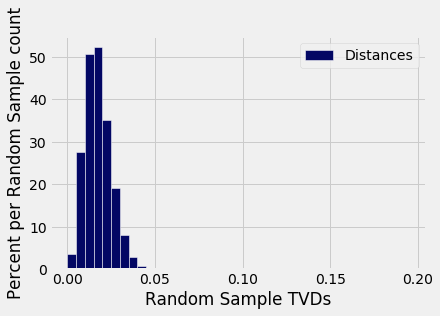

In [50]:
pd.DataFrame({"Distances": sample_distances}).plot.hist(bins=np.arange(0, 0.2, 0.005),density=True, color="xkcd:darkblue", ec="white")
plt.xlabel("Random Sample TVDs")
plt.title("")
plt.ylabel("Percent per Random Sample count")  # not actually a percent, it is normed to 1...

In [52]:
eligible.sum()

1.0

In [58]:
sum(jury["Eligible"] - jury["Panels"])*10**17

-2.7755575615628914